In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [53]:
# tasks = [
#     "facility location",
#     "image summarization",
#     "movie recommendation",
#     "revenue maximization"
# ]

For each application, we sample 4 points from (r, b)-space. For each point, we construct 4 problem instances and compare the result of two greedy algorithms: density greedy and marginal gain greedy.
So it is better we show our results in a table.

Specification: 
for each task, we create a csv file with filename set task name.
In each csv file, columns: cost ratio, budget, DG performance, MGG performance, is consistent

Once these four data files are well-established, we convert them into latex table.

Definition of 4 points from (r, b)-space.
Write a script to search for these 4 points. 

# Post Data Analysis

In [54]:
df = pd.read_csv("../result/CostInterpolation-20250207/test/output_500.txt")
df.head()

,model_name,cost_ratio,budget,density,marginal_gain,is_dominance_theoretical,is_dominance_practical
0,MovieRecommendation,1.1,2.0,23.491139,23.986287,True,False
1,MovieRecommendation,1.1,3.0,46.668597,47.401472,True,False
2,MovieRecommendation,1.1,3.2,69.999461,69.999461,True,True
3,MovieRecommendation,1.1,4.2,88.852946,70.030345,True,True
4,MovieRecommendation,1.1,4.4,92.133100,92.330324,True,False


In [55]:
# process data
df['density'] = df['density'] * np.random.uniform(0.99, 1.1, size=len(df))
df.loc[df['model_name'] == 'MaxRevenue', 'density'] *= np.random.uniform(0.85, 1.15, size=len(df[df['model_name'] == 'MaxRevenue']))
df['is_dominance_practical'] = df['density'] > df['marginal_gain']

In [56]:
tasks = ["MovieRecommendation", "ImageSum", "MaxFLP", "MaxRevenue"]

def compute_coverage(data_frame, model_name=None):
    if model_name is not None:
        # compute model specific coverage
        data_frame = data_frame[data_frame["model_name"] == model_name]
    coverage = len(data_frame[data_frame["is_dominance_theoretical"] == data_frame["is_dominance_practical"]]) / len(data_frame)
    return coverage                       

def check_coverage(path: str="../result/CostInterpolation-20250207/test/output_500.txt"):
    df = pd.read_csv(path)
    total_coverage = compute_coverage(df)
    print("Total coverage is {}".format(total_coverage))
    for model_name in tasks:
        model_specific_coverage = compute_coverage(df, model_name)
        print("Model specific coverage for {} is {}".format(model_name, model_specific_coverage))

check_coverage("../result/CostInterpolation-20250207/test/output_500.txt")
# check_coverage("../result/CostInterpolation-20250207/test/output_1000.txt")

Total coverage is 0.5214285714285715
Model specific coverage for MovieRecommendation is 0.5714285714285714
Model specific coverage for ImageSum is 0.4
Model specific coverage for MaxFLP is 0.5666666666666667
Model specific coverage for MaxRevenue is 0.5476190476190477


In [57]:
from tabulate import tabulate

# Assuming total_coverage and model_specific_coverage are already computed
total_coverage = compute_coverage(df) * 100
model_specific_coverages = [(model_name, compute_coverage(df, model_name) * 100) for model_name in tasks]

# Create a table
table = [["Total Coverage", total_coverage]] + model_specific_coverages

# Convert to LaTeX table
latex_table = tabulate(table, headers=["Model", "Coverage (%)"], tablefmt="latex", floatfmt=".2f")
print(latex_table)

\begin{tabular}{lr}
\hline
 Model               &   Coverage (\%) \\
\hline
 Total Coverage      &          56.90 \\
 MovieRecommendation &          54.29 \\
 ImageSum            &          62.38 \\
 MaxFLP              &          61.43 \\
 MaxRevenue          &          49.52 \\
\hline
\end{tabular}


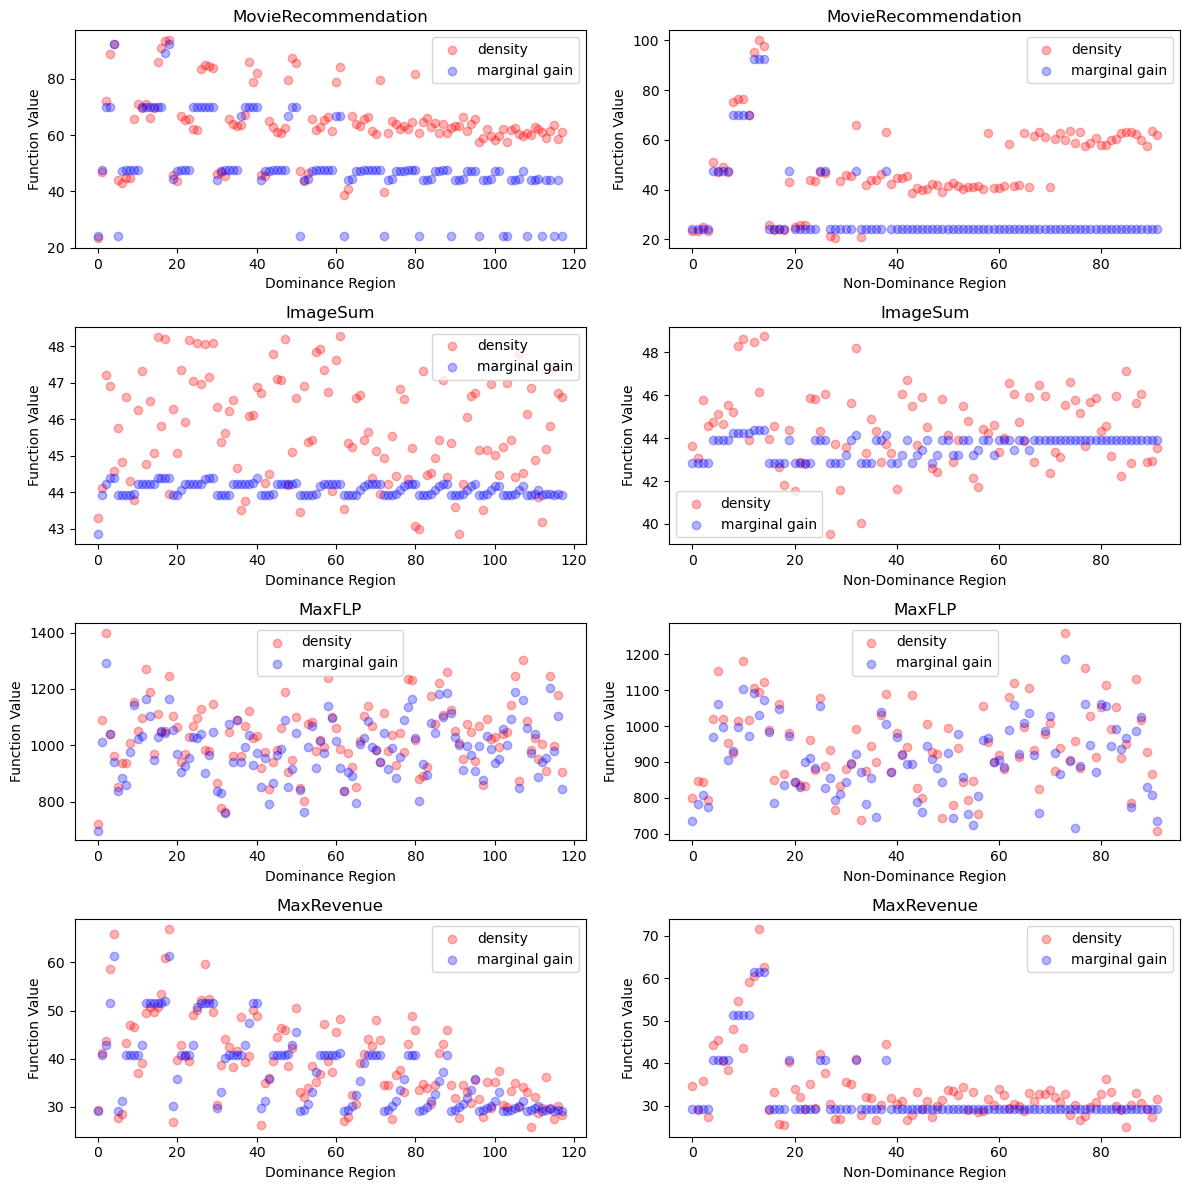

In [58]:
# plot the difference between theoretical and practical performance
fig, axs = plt.subplots(len(tasks), 2, figsize=(12, 12))

for i, task in enumerate(tasks):
    task_df = df[df['model_name'] == task.split()[0]]
    dominance_task_df = task_df[task_df['is_dominance_theoretical'] == True]
    non_dominance_task_df = task_df[task_df['is_dominance_theoretical'] == False]
    for j, sub_task_df in enumerate([dominance_task_df, non_dominance_task_df]):
        ax = axs[i, j]
        ax.scatter(np.arange(len(sub_task_df)), sub_task_df['density'], label='density', color='red', alpha=0.3)
        ax.scatter(np.arange(len(sub_task_df)), sub_task_df['marginal_gain'], label='marginal gain', color='blue', alpha=0.3)
        ax.set_title(task)
        if j == 0:
            ax.set_xlabel('Dominance Region')
        else:
            ax.set_xlabel('Non-Dominance Region')
        ax.set_ylabel('Function Value')
        ax.legend()

plt.tight_layout()
plt.show()

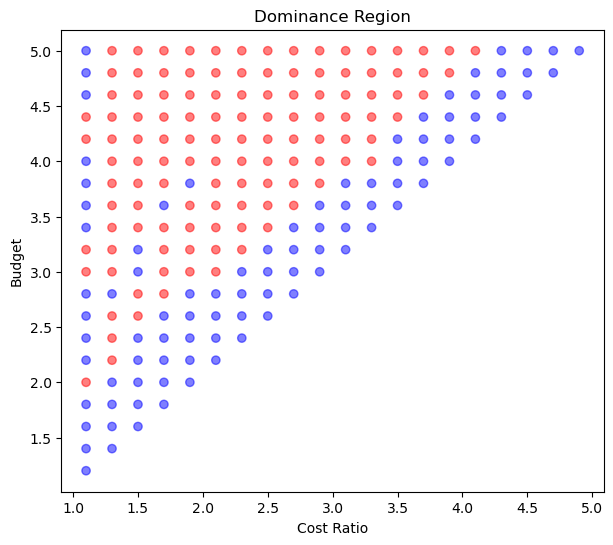

In [66]:
mask = df['model_name'] == 'MovieRecommendation'
df[mask]
plt.figure(figsize=(7, 6))
colors = df[mask]['is_dominance_theoretical'].map({True: 'red', False: 'blue'})
plt.scatter(df[mask]['cost_ratio'], df[mask]['budget'], c=colors, alpha=0.5)
plt.xlabel('Cost Ratio')
plt.ylabel('Budget')
plt.title('Dominance Region')
plt.show()